In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

from gensim.models.wrappers.dtmmodel import DtmModel
from gensim.corpora import Dictionary, bleicorpus
from gensim import corpora,models
import pyLDAvis

In [19]:
import pandas as pd
from tqdm import tqdm
from MeCab import Tagger

kaken = pd.read_csv('../kaken_tetsugaku/kaken.nii.ac.jp_tetsugaku.csv')
for n,i in tqdm(enumerate(kaken.研究概要.isnull())):
    if i == True:
        kaken = kaken.drop(n)
stop_words = []
with open("../stop_words.txt") as f:
    for line in f.readlines():
        line = line.rstrip()
        stop_words.append(line)
print(stop_words)

# 形態素解析
# 名詞、動詞、形容詞のみを抽出
import MeCab
tagger = MeCab.Tagger()
texts = []
for sentence in tqdm(kaken.研究概要):
    words = []
    node = tagger.parseToNode(sentence)
    while node:
        features = node.feature.split(",")
        if features[0] in ["名詞","動詞","形容詞"]:
            word = node.surface if features[6] == "*" else features[6]
            if word not in stop_words:
                words.append(word)
                node = node.next
        node = node.next
    texts.append(words)
# gensimをもちいて辞書とコーパスを作成
dictionary = corpora.Dictionary(texts)
dictionary.save('kaken_tetsugaku.dict') 
corpus = [dictionary.doc2bow(text) for text in texts]

#corpus = corpora.MmCorpus('../kaken.mm')
#corpora.MmCorpus.serialize('../../kaken.mm', corpus)

3244it [00:01, 2373.93it/s]
 17%|█▋        | 311/1841 [00:00<00:01, 1466.84it/s]

['', '', '”', '"', '’', "'", ',', ',', '．', '.', '\x08、', '\x08。', '-', '—', '「', '」', '（', '）', '/', '／', '&', '＆', '・', '×', '…', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '０', '１', '２', '３', '４', '５', '６', '７', '８', '９', '一', '二', '三', '四', '五', '六', '七', '八', '九', 'i', 'it', 'm', 'no', 'the', '合う', 'ある', 'いい', 'いう', 'いく', 'いま', '今', 'いる', '駅', 'おく', 'かける', '方', 'がた', '感', '口', 'くる', 'くれる', 'ここ', 'こっち', 'こと', 'こなす', 'こむ', 'これ', 'さ', 'ザ', 'ざす', 'さりげ', '氏', 'ジ', 'しまう', 'しょ', 'しれる', 'する', '性', 'せる', 'そこ', 'そのもの', 'それ', 'それら', 'たち', 'ため', '地', '邸', '邸宅', '的', 'でく', 'とおす', 'とき', 'どこ', 'とまる', 'とる', 'ない', 'なか', 'なす', 'なる', 'なん', '似る', 'の', '分', 'ほう', 'み', 'む', 'もつ', '持つ', 'もの', 'ゆく', 'よい', 'よう', 'らい', 'られる', 'れる', '研究', '手法', '示す', '問題', '結果', '用いる', 'システム', '実現', '構築', '評価', '論文', '調査', '成果', '発表', '提案', '行う', '利用', '開発', '可能', 'モデル', '基づく', 'できる', '情報', '抽出', '検討', '(', ')', '実験', '得る', '明らか', '年度', '方法', ')、', 'and', ':']


100%|██████████| 1841/1841 [00:01<00:00, 1049.89it/s]


In [20]:
time = []
for year in kaken['研究期間 (年度)']:
    time.append(int(year[0:4]))
from collections import Counter
counter = Counter(time)
time_slice = list(counter.values())
time_slice.reverse()

In [21]:
dtm_path = "/home/makoto/dtm/dtm/dtm"
dtm_model = DtmModel(dtm_path, corpus, time_slice, num_topics=10, id2word=dictionary, initialize_lda=True)
dtm_model.save('dtm_tetsugaku')

In [25]:
doc_topic, topic_term, doc_lengths, term_frequency, vocab = dtm_model.dtm_vis(time=0, corpus=corpus)
vis_wrapper = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_wrapper)

In [26]:
doc_topic, topic_term, doc_lengths, term_frequency, vocab = dtm_model.dtm_vis(time=1, corpus=corpus)
vis_wrapper = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_wrapper)

In [27]:
doc_topic, topic_term, doc_lengths, term_frequency, vocab = dtm_model.dtm_vis(time=2, corpus=corpus)
vis_wrapper = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_wrapper)

In [28]:
doc_topic, topic_term, doc_lengths, term_frequency, vocab = dtm_model.dtm_vis(time=3, corpus=corpus)
vis_wrapper = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_wrapper)

In [29]:
doc_topic, topic_term, doc_lengths, term_frequency, vocab = dtm_model.dtm_vis(time=4, corpus=corpus)
vis_wrapper = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_wrapper)

In [30]:
doc_topic, topic_term, doc_lengths, term_frequency, vocab = dtm_model.dtm_vis(time=5, corpus=corpus)
vis_wrapper = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_wrapper)

In [31]:
doc_topic, topic_term, doc_lengths, term_frequency, vocab = dtm_model.dtm_vis(time=6, corpus=corpus)
vis_wrapper = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_wrapper)

In [32]:
doc_topic, topic_term, doc_lengths, term_frequency, vocab = dtm_model.dtm_vis(time=7, corpus=corpus)
vis_wrapper = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_wrapper)

In [33]:
doc_topic, topic_term, doc_lengths, term_frequency, vocab = dtm_model.dtm_vis(time=8, corpus=corpus)
vis_wrapper = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_wrapper)

In [34]:
doc_topic, topic_term, doc_lengths, term_frequency, vocab = dtm_model.dtm_vis(time=9, corpus=corpus)
vis_wrapper = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_wrapper)

In [37]:
doc_topic, topic_term, doc_lengths, term_frequency, vocab = dtm_model.dtm_vis(time=10, corpus=corpus)
vis_wrapper = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_wrapper)

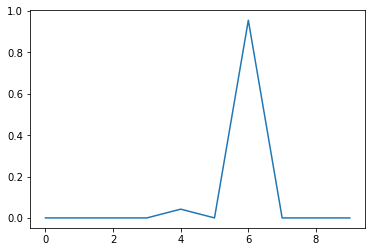